## This scripts aims to;
- load in WW data that has been mapped to CIS sub-regions
- explore LOD by CID/CIS prevalence
- this analysis has been updated, including all the replicate data

In [1]:
install.packages('janitor')
install.packages('cowplot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
#load in packages
library(tidyverse)
library(janitor)
library(ggplot2)
library(cowplot)

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [30]:
# file 8 

In [3]:
# read in data
# -- this data has been updated to include everything we need
datadir <- c("/home/ec2-user/SageMaker/jbc-wastewater-analysis/data/")
dat <- read.csv(paste0(datadir,"raw_data_ww_10_cis_mar22.csv")) %>% clean_names()

#print(dat$date[1:3])
dat$date <- as.Date(dat$date,'%Y-%m-%d')
summary(dat$date)
names(dat) 

# dates relevant for the paper...
first_date <- as.Date("01-07-2020",'%d-%m-%Y')
last_date <- as.Date("31-03-2021",'%d-%m-%Y')  #
#table(dat2$)
dat2 <- dat %>% filter(date>=first_date & date<=last_date & analysis_lab_code=='EA')
dim(dat2)
head(dat2)
#dir()

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2020-09-04" "2020-10-12" "2020-11-20" "2020-11-20" "2021-01-03" "2021-02-10"

[1] "x"                                                
  [2] "startday"                                         
  [3] "ww_site_code"                                     
  [4] "sample_id"                                        
  [5] "timestamp_cdw_processed"                          
  [6] "site_skey"                                        
  [7] "date"                                             
  [8] "time_sample_collected"                            
  [9] "date_sample_received"                             
 [10] "time_sample_received"                             
 [11] "date_sample_analysed"                             
 [12] "time_sample_analysed"                             
 [13] "date_sample_reported"                             
 [14] "time_sample_reported"                             
 [15] "sub_sample_volume_ml"                             
 [16] "temp_within_limits_ind"                           
 [17] "transit_within_limits_ind"                        
 [18] "target_gene_ind"                                  
 [19] "ansis_control"                                    
 [20] "reac_vol_sars"                                    
 [21] "reac_vol_control"                                 
 [22] "raw_ansis_sars_repc_1"                            
 [23] "raw_ansis_sars_repc_2"                            
 [24] "raw_ansis_sars_repc_3"                            
 [25] "raw_ansis_sars_repc_mean"                         
 [26] "raw_ansis_sars_repc_std"                          
 [27] "raw_ansis_sars_ct_repc_1"                         
 [28] "raw_ansis_sars_ct_repc_2"                         
 [29] "raw_ansis_sars_ct_repc_3"                         
 [30] "raw_ansis_control_repc_1"                         
 [31] "raw_ansis_control_repc_2"                         
 [32] "raw_ansis_control_repc_3"                         
 [33] "raw_ansis_control_ct_repc_1"                      
 [34] "raw_ansis_control_ct_repc_2"                      
 [35] "raw_ansis_control_ct_repc_3"                      
 [36] "raw_ansis_control_con_repc_1"                     
 [37] "raw_ansis_control_con_repc_2"                     
 [38] "raw_ansis_control_con_repc_3"                     
 [39] "raw_ansis_control_ct_con_repc_1"                  
 [40] "raw_ansis_control_ct_con_repc_2"                  
 [41] "raw_ansis_control_ct_con_repc_3"                  
 [42] "sars_cov2_gc_l_mean"                              
 [43] "control_gc_l_mean"                                
 [44] "lab_analysis_method"                              
 [45] "lod_sars_gc_l"                                    
 [46] "lod_control_gc_l"                                 
 [47] "lod_sars_ct"                                      
 [48] "lod_control_ct"                                   
 [49] "loq_sars_gc_l"                                    
 [50] "loq_control_gc_l"                                 
 [51] "loq_sars_ct"                                      
 [52] "loq_control_ct"                                   
 [53] "rna_detected_ind"                                 
 [54] "analysis_lab_code"                                
 [55] "sample_ph_pre_ansis"                              
 [56] "conductivity_ms_cm"                               
 [57] "suspended_solids_mg_l"                            
 [58] "dry_matter_mg_l"                                  
 [59] "ammonia_mg_l"                                     
 [60] "ophosph_mg_l"                                     
 [61] "turbidity_ntu"                                    
 [62] "grab_compo_ind"                                   
 [63] "autosample_volume_ml"                             
 [64] "compo_win_start_time"                             
 [65] "comp_collect_interval_min"                        
 [66] "lab_comments"                                     
 [67] "sample_barcode_scan"                              
 [68] "date_compo_started"                               
 [69] "time_compo_started"                               


[1] 10284   119

,x,startday,ww_site_code,sample_id,timestamp_cdw_processed,site_skey,date,time_sample_collected,date_sample_received,time_sample_received,⋯,sars_cov2_gc_l_mean_v2,grab_compo_boo,catchment_area,dayofweek,cis20cd,catch_in_cis_prop,catch_cis_population,median_prob,ll,ul
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<date>,<int>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8396,2020-08-31,UKENNE_NU_TP000055,2003957-01,2022-03-10 14:02:42.0,21565,2020-09-04,900,2020-09-05,834,⋯,411.6002,1,75.71834,4,J06000104,0.190042,58576.83,0.1632855,0.09930407,0.2683391
2,8397,2020-08-31,UKENNE_NU_TP000055,2003957-02,2022-03-10 14:02:42.0,21565,2020-09-06,1215,2020-09-07,908,⋯,10322.5654,1,75.71834,6,J06000104,0.190042,58576.83,0.1871473,0.11667896,0.2993406
3,8401,2020-09-07,UKENNE_NU_TP000055,2003957-03,2022-03-10 14:02:42.0,21565,2020-09-07,900,2020-09-08,824,⋯,1641.4827,1,75.71834,0,J06000104,0.190042,58576.83,0.1990781,0.12536641,0.3148414
4,8400,2020-09-07,UKENNE_NU_TP000055,2003957-04,2022-03-10 14:02:42.0,21565,2020-09-09,900,2020-09-10,847,⋯,66.5000,1,75.71834,2,J06000104,0.190042,58576.83,0.2229399,0.14274130,0.3458429
5,8398,2020-09-07,UKENNE_NU_TP000055,2003957-05,2022-03-10 14:02:42.0,21565,2020-09-11,900,2020-09-12,837,⋯,608.0801,1,75.71834,4,J06000104,0.190042,58576.83,0.2536489,0.16576187,0.3854879
6,8399,2020-09-07,UKENNE_NU_TP000055,2003957-06,2022-03-10 14:02:42.0,21565,2020-09-13,900,2020-09-14,928,⋯,1991.5640,1,75.71834,6,J06000104,0.190042,58576.83,0.2912053,0.19442813,0.4337764


In [19]:
names(dat2)
head(dat2)

[1] "x"                                                
  [2] "startday"                                         
  [3] "ww_site_code"                                     
  [4] "sample_id"                                        
  [5] "timestamp_cdw_processed"                          
  [6] "site_skey"                                        
  [7] "date"                                             
  [8] "time_sample_collected"                            
  [9] "date_sample_received"                             
 [10] "time_sample_received"                             
 [11] "date_sample_analysed"                             
 [12] "time_sample_analysed"                             
 [13] "date_sample_reported"                             
 [14] "time_sample_reported"                             
 [15] "sub_sample_volume_ml"                             
 [16] "temp_within_limits_ind"                           
 [17] "transit_within_limits_ind"                        
 [18] "target_gene_ind"                                  
 [19] "ansis_control"                                    
 [20] "reac_vol_sars"                                    
 [21] "reac_vol_control"                                 
 [22] "raw_ansis_sars_repc_1"                            
 [23] "raw_ansis_sars_repc_2"                            
 [24] "raw_ansis_sars_repc_3"                            
 [25] "raw_ansis_sars_repc_mean"                         
 [26] "raw_ansis_sars_repc_std"                          
 [27] "raw_ansis_sars_ct_repc_1"                         
 [28] "raw_ansis_sars_ct_repc_2"                         
 [29] "raw_ansis_sars_ct_repc_3"                         
 [30] "raw_ansis_control_repc_1"                         
 [31] "raw_ansis_control_repc_2"                         
 [32] "raw_ansis_control_repc_3"                         
 [33] "raw_ansis_control_ct_repc_1"                      
 [34] "raw_ansis_control_ct_repc_2"                      
 [35] "raw_ansis_control_ct_repc_3"                      
 [36] "raw_ansis_control_con_repc_1"                     
 [37] "raw_ansis_control_con_repc_2"                     
 [38] "raw_ansis_control_con_repc_3"                     
 [39] "raw_ansis_control_ct_con_repc_1"                  
 [40] "raw_ansis_control_ct_con_repc_2"                  
 [41] "raw_ansis_control_ct_con_repc_3"                  
 [42] "sars_cov2_gc_l_mean"                              
 [43] "control_gc_l_mean"                                
 [44] "lab_analysis_method"                              
 [45] "lod_sars_gc_l"                                    
 [46] "lod_control_gc_l"                                 
 [47] "lod_sars_ct"                                      
 [48] "lod_control_ct"                                   
 [49] "loq_sars_gc_l"                                    
 [50] "loq_control_gc_l"                                 
 [51] "loq_sars_ct"                                      
 [52] "loq_control_ct"                                   
 [53] "rna_detected_ind"                                 
 [54] "analysis_lab_code"                                
 [55] "sample_ph_pre_ansis"                              
 [56] "conductivity_ms_cm"                               
 [57] "suspended_solids_mg_l"                            
 [58] "dry_matter_mg_l"                                  
 [59] "ammonia_mg_l"                                     
 [60] "ophosph_mg_l"                                     
 [61] "turbidity_ntu"                                    
 [62] "grab_compo_ind"                                   
 [63] "autosample_volume_ml"                             
 [64] "compo_win_start_time"                             
 [65] "comp_collect_interval_min"                        
 [66] "lab_comments"                                     
 [67] "sample_barcode_scan"                              
 [68] "date_compo_started"                               
 [69] "time_compo_started"                               


,x,startday,ww_site_code,sample_id,timestamp_cdw_processed,site_skey,date,time_sample_collected,date_sample_received,time_sample_received,⋯,water_company_uu,water_company_ww,water_company_wxw,water_company_yw,reception_delay,catchment_area,dayofweek,cis20cd,catch_in_cis_prop,catch_cis_population
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,378,2021-03-01,UKENTH_TWU_TP000015,2005159-24,2021-12-15 16:01:32.0,22225,2021-03-01,1000,2021-03-02,811,⋯,0,0,0,0,22.18333,202.7331,0,J06000198,0.1201438,54129.46
2,379,2021-03-01,UKENTH_TWU_TP000015,2005159-24,2021-12-15 16:01:32.0,22225,2021-03-01,1000,2021-03-02,811,⋯,0,0,0,0,22.18333,202.7331,0,J06000190,1.3827349,259781.33
3,380,2021-03-01,UKENTH_TWU_TP000015,2005159-24,2021-12-15 16:01:32.0,22225,2021-03-01,1000,2021-03-02,811,⋯,0,0,0,0,22.18333,202.7331,0,J06000189,0.9624285,96989.70
4,381,2021-03-01,UKENTH_TWU_TP000015,2005159-25,2021-12-15 16:01:32.0,22225,2021-03-03,1000,2021-03-04,748,⋯,0,0,0,0,21.80000,202.7331,2,J06000198,0.1201438,54129.46
5,382,2021-03-01,UKENTH_TWU_TP000015,2005159-25,2021-12-15 16:01:32.0,22225,2021-03-03,1000,2021-03-04,748,⋯,0,0,0,0,21.80000,202.7331,2,J06000190,1.3827349,259781.33
6,383,2021-03-01,UKENTH_TWU_TP000015,2005159-25,2021-12-15 16:01:32.0,22225,2021-03-03,1000,2021-03-04,748,⋯,0,0,0,0,21.80000,202.7331,2,J06000189,0.9624285,96989.70


In [4]:
summary(dat2$raw_ansis_sars_repc_1)
print(paste0('samples with <LOD = ',sum(dat2$raw_ansis_sars_repc_1 < 0)))
tmp <- table(dat2$raw_ansis_sars_repc_1)
print(tmp[1:5])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -4.00   19.93   84.38  264.67  295.43 5059.12 

[1] "samples with <LOD = 1037"

                -4                 -3  -1.39127373695374  -1.31356525421143 
               842                188                  3                  2 
-0.671360651652018 
                 1 



   0    1 
9814  470 


Warning message in eval(expr, envir, enclos):
“NaNs produced”


[1] "-4 in log10 space is = NaN"
[1] "Number of samples below LoD (ie. -4) = 1051"
[1] "Of a total 10284 samples"


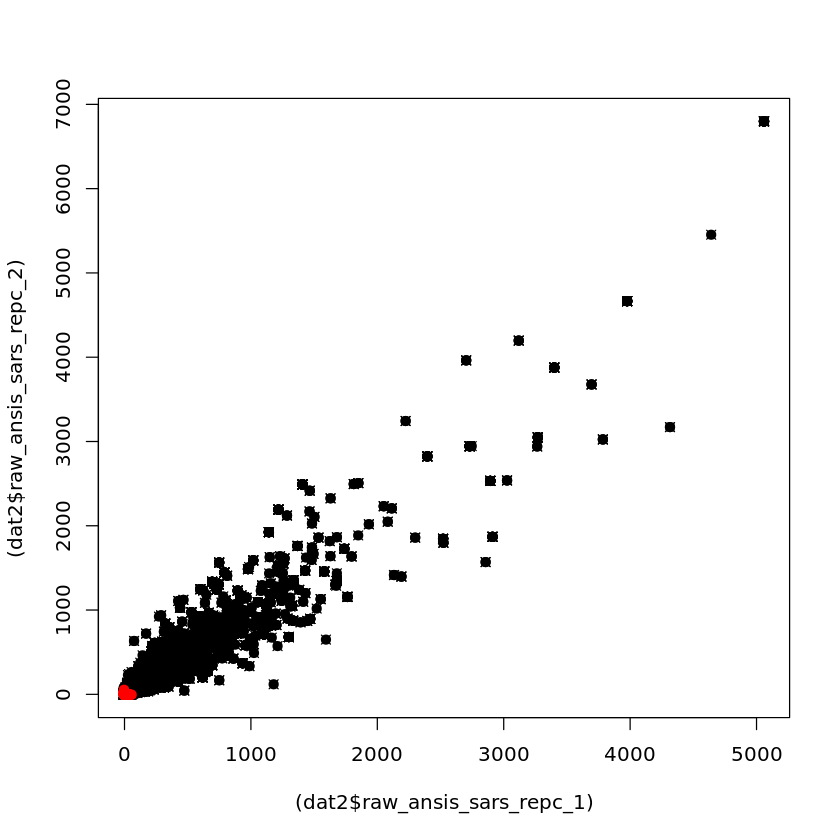

In [5]:
# I checked whether LOD was calculated correctly and it isn't, sigh
# but actually I think this depends on the definition, so it's ok.
# calc again
dat2$sars_raw_rep_below_lod <- 0
dat2$sars_raw_rep_below_lod[dat2$raw_ansis_sars_repc_1 == -4] <- 1
dat2$sars_raw_rep_below_lod[dat2$raw_ansis_sars_repc_2 == -4] <- 1
#print(summary(dat2$sars_below_lod-dat2$tmp))

# check that sars_below_lod is correctly done
print(table(dat2$sars_below_lod))
tmp <- log10(-4)
print(paste0('-4 in log10 space is = ',tmp))
# plot
plot((dat2$raw_ansis_sars_repc_1),(dat2$raw_ansis_sars_repc_2),pch=4)
aa <- which(dat2$sars_raw_rep_below_lod == 0)
points((dat2$raw_ansis_sars_repc_1[aa]),(dat2$raw_ansis_sars_repc_2[aa]),pch=19,col='black')
oo <- which(dat2$sars_raw_rep_below_lod == 1)

print(paste0('Number of samples below LoD (ie. -4) = ',length(oo)))
print(paste0('Of a total ',dim(dat2)[1],' samples'))
points((dat2$raw_ansis_sars_repc_1[oo]),(dat2$raw_ansis_sars_repc_2[oo]),pch=19,col='red')



In [56]:
# provide breaks for gc/l data
# group obs by these values, and look at the LoD curves
summary(log10(dat2$sars_cov2_gc_l_mean))
brks <- seq(1,6,by=0.1)
labels <- round(10^brks[1:(length(brks)-1)],1)
dat2$sars_cov2_gc_l_mean_cut_v2 <- cut(log10(dat2$sars_cov2_gc_l_mean_v2),breaks=brks,labels=labels[1:(length(brks)-1)])
table(dat2$sars_cov2_gc_l_mean_cut_v2)

# should also look at impact of lab change (which occured on 01-Jan-2021)
dat2$labch <- 0
dat2$labch[dat2$date >= as.Date("01-01-2021",'%d-%m-%Y')] <- 1
table(dat2$labch)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2538  3.5406  4.0963  3.9948  4.5991  5.8979 


      10     12.6     15.8       20     25.1     31.6     39.8     50.1 
       1        0        0        0        0        0        0        0 
    63.1     79.4      100    125.9    158.5    199.5    251.2    316.2 
     645        0        0        2       65        4        3       67 
   398.1    501.2      631    794.3     1000   1258.9   1584.9   1995.3 
       3       16       26       64      108      225      154      423 
  2511.9   3162.3   3981.1   5011.9   6309.6   7943.3    10000  12589.3 
     423      339      366      544      551      540      632      562 
 15848.9  19952.6  25118.9  31622.8  39810.7  50118.7  63095.7  79432.8 
     486      502      466      494      378      482      404      295 
   1e+05 125892.5 158489.3 199526.2 251188.6 316227.8 398107.2 501187.2 
     293      268      168      111       60       50       32       14 
630957.3 794328.2 
      15        0 


   0    1 
7629 2655 

In [11]:
# add a plot of impact of sample (grab / comp) on relationship
print(table(dat2$compo_frac))
dat2$compo_fracb <- c('Grab')
dat2$compo_fracb[dat2$compo_frac>0] <- c('Comp')
p1 <- ggplot(data=dat2,aes(x=median_prob,y=sars_cov2_gc_l_mean,col=compo_fracb)) + 
    geom_point() +
    scale_y_continuous(trans='log10') +
    theme_bw()

pdf(paste0(datadir,'grab_comp_data_mar22.pdf'),height=4,width=6)
p1
dev.off()


                0 0.333333333333333               0.5 0.666666666666667 
             3831                14                 3                45 
             0.75                 1 
                1              6390 


png 
  2

In [57]:
# I want to compare  CIS and LoD...
summary(dat2$median_prob)
brks <- seq(0.02,6.8,by=0.1)
labels <- round(brks[1:(length(brks)-1)],1)
dat2$median_cut <- cut(dat2$median_prob,breaks=brks,labels=labels[1:(length(brks)-1)])
table(dat2$median_cut)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02746 0.46679 0.92898 1.12393 1.54201 6.75950 


  0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9   1 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 
540 765 554 481 525 521 609 566 539 502 485 407 417 440 284 262 248 200 219 224 
  2 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9   3 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 
143 153 111 159 115 131 122  93  50  79  46  43  20  23  22  24  18  19  17  14 
  4 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 
  4   5   4  10   9   7  13   5   3   5   1   6   2   2   2   0   2   4   3   0 
  6 6.1 6.2 6.3 6.4 6.5 6.6 
  3   1   0   1   1   0   0 

[1] 1051


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ median_cut, family = binomial, data = tab2)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.223989  -0.058039  -0.026305  -0.006018   0.185003  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -1.182      1.407  -0.840    0.401
median_cut    -1.332      1.266  -1.052    0.293

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2.91667  on 33  degrees of freedom
Residual deviance: 0.24964  on 32  degrees of freedom
AIC: 6.4251

Number of Fisher Scoring iterations: 9

    x median_cut       pred
1 0.0        0.0 0.23474964
2 0.2        0.2 0.19030588
3 0.4        0.4 0.15259850
4 0.6        0.6 0.12124373
5 0.8        0.8 0.09560465
6 1.0        1.0 0.07492511


png 
  2

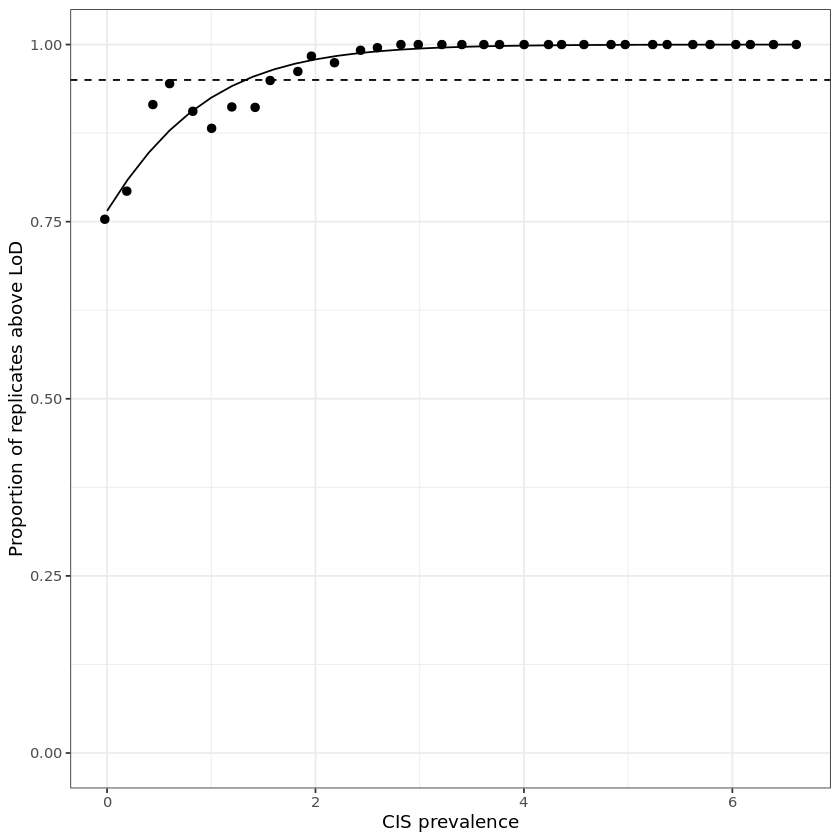

In [76]:
tab2 <- dat2 %>% group_by(median_cut) %>% summarize(n=n(),
                                        #compo_frac = mean(compo_frac),
                                        blw_lod = sum(sars_raw_rep_below_lod),
                                        blw_lod_pct = sum(sars_raw_rep_below_lod)/n())


tab2 <- as.data.frame(tab2)
tab2$median_cut <- as.numeric(as.character(tab2$median_cut))
print(sum(tab2$blw_lod))
#print(table(dat2$sars_below_lod))
#print(tab2)

# simple first...
p2 <- ggplot(tab2,aes(jitter(median_cut),1-blw_lod_pct)) + 
   geom_point(cex=2) + 
   xlab('CIS prevalence') +
   theme(legend.position = "none") #+ geom_line()
#p2

m2 <- glm(blw_lod_pct ~ median_cut,data=tab2,family=binomial)
print(summary(m2))

#tmp <- unique(dat2$ww_site_code)
ndat <- as.data.frame(expand.grid(x=brks[1:(length(brks)-1)]))
ndat$median_cut <- ndat$x
ndat$pred <- predict(m2,newdata = ndat,type = "response")
print(head(ndat))
p2a <- p2 + geom_hline(yintercept=0.95,linetype='dashed') +
   geom_line(data=ndat,aes(x=median_cut,y=1-pred)) +
   xlab('CIS prevalence') + 
   ylab('Proportion of replicates above LoD') +
    ylim(0,1) +
    theme_bw()
p2a

pdf(paste0(datadir,'lod_analysis_no_site_mar22.pdf'),height=5,width=6)
p2a
dev.off()

In [73]:
# add in lab change event
dat2$labv <- 0
tmp <- as.Date("01-01-2021",'%d-%m-%Y')
dat2$labv[dat2$date >= tmp] <- 1
print('table of lab version')
table(dat2$labv)

[1] "table of lab version"



   0    1 
7629 2655 


   0  0.2  0.4  0.6  0.8    1  1.2  1.4  1.6  1.8    2  2.2  2.4  2.6  2.8    3 
1176 1068 1015 1197 1051  905  863  575  473  421  306  273  248  228  135   94 
 3.2  3.4  3.6  3.8    4  4.2  4.4  4.6  4.8    5  5.2  5.4  5.6  5.8    6  6.2 
  44   48   38   31    8   16   16   13   13    7    3    3    3    6    4    1 
 6.4  6.6 
   1    1 

`summarise()` has grouped output by 'median_cut', 'ww_site_code'. You can override using the `.groups` argument.

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ median_cut, family = binomial, data = tab2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.90042  -0.39478  -0.21822  -0.05606   2.39757  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6934     0.1922  -3.608 0.000308 ***
median_cut   -1.5162     0.2008  -7.550 4.36e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 377.14  on 974  degrees of freedom
Residual deviance: 284.79  on 973  degrees of freedom
AIC: 393.73

Number of Fisher Scoring iterations: 7



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ median_cut + ww_site_code, family = binomial, 
    data = tab2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.30153  -0.23975  -0.10139  -0.00954   2.24755  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.353e+00  1.639e+00  -1.436  0.15102    
median_cut                      -1.556e+00  2.637e-01  -5.901 3.62e-09 ***
ww_site_codeUKENAN_AW_TP000063   5.037e-01  2.031e+00   0.248  0.80411    
ww_site_codeUKENAN_AW_TP000161   9.713e-01  1.912e+00   0.508  0.61150    
ww_site_codeUKENAN_AW_TP000200   1.652e+00  1.829e+00   0.903  0.36627    
ww_site_codeUKENAN_AW_TP000210  -1.981e+00  4.304e+00  -0.460  0.64523    
ww_site_codeUKENMI_ST_TP000020   2.743e+00  1.748e+00   1.569  0.11658    
ww_site_codeUKENMI_ST_TP000068  -3.619e-01  2.486e+00  -0.146  0.88425    
ww_site_codeUKENMI_ST_TP000074   1.087e+00  1.894e+00   0.574  0.56586    
ww_site_code

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ median_cut + compo_frac + ww_site_code, 
    family = binomial, data = tab2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3275  -0.2404  -0.1001  -0.0100   2.2332  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -3.176e+00  2.067e+00  -1.536  0.12449    
median_cut                      -1.547e+00  2.637e-01  -5.865 4.48e-09 ***
compo_frac                       8.273e-01  1.270e+00   0.651  0.51475    
ww_site_codeUKENAN_AW_TP000063   4.925e-01  2.031e+00   0.243  0.80835    
ww_site_codeUKENAN_AW_TP000161   9.845e-01  1.913e+00   0.515  0.60674    
ww_site_codeUKENAN_AW_TP000200   1.676e+00  1.829e+00   0.916  0.35963    
ww_site_codeUKENAN_AW_TP000210  -1.992e+00  4.304e+00  -0.463  0.64351    
ww_site_codeUKENMI_ST_TP000020   3.558e+00  2.150e+00   1.654  0.09804 .  
ww_site_codeUKENMI_ST_TP000068   4.546e-01  2.784e+00   0.163  0.87029    
ww_site_c

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = blw_lod_pct ~ median_cut + labv + ww_site_code, 
    family = binomial, data = tab2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.27960  -0.24004  -0.09934  -0.00831   2.18562  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -2.38825    1.63865  -1.457  0.14499    
median_cut                        -1.64519    0.28799  -5.713 1.11e-08 ***
labv                               0.29162    0.32199   0.906  0.36511    
ww_site_codeUKENAN_AW_TP000063     0.50669    2.02952   0.250  0.80285    
ww_site_codeUKENAN_AW_TP000161     0.94540    1.91134   0.495  0.62086    
ww_site_codeUKENAN_AW_TP000200     1.64881    1.82732   0.902  0.36689    
ww_site_codeUKENAN_AW_TP000210    -1.97853    4.30320  -0.460  0.64567    
ww_site_codeUKENMI_ST_TP000020     2.75847    1.74672   1.579  0.11428    
ww_site_codeUKENMI_ST_TP000068    -0.33952    2.48467  -0.137  0.89131    
ww_si

Analysis of Deviance Table

Model 1: blw_lod_pct ~ median_cut
Model 2: blw_lod_pct ~ median_cut + ww_site_code
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)    
1       973     284.79                         
2       929     140.32 44   144.47 1.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
    x       ww_site_code median_cut       pred
1 0.0 UKENNE_NU_TP000055        0.0 0.33327827
2 0.2 UKENNE_NU_TP000055        0.2 0.26960436
3 0.4 UKENNE_NU_TP000055        0.4 0.21418747
4 0.6 UKENNE_NU_TP000055        0.6 0.16754846
5 0.8 UKENNE_NU_TP000055        0.8 0.12939280
6 1.0 UKENNE_NU_TP000055        1.0 0.09889403


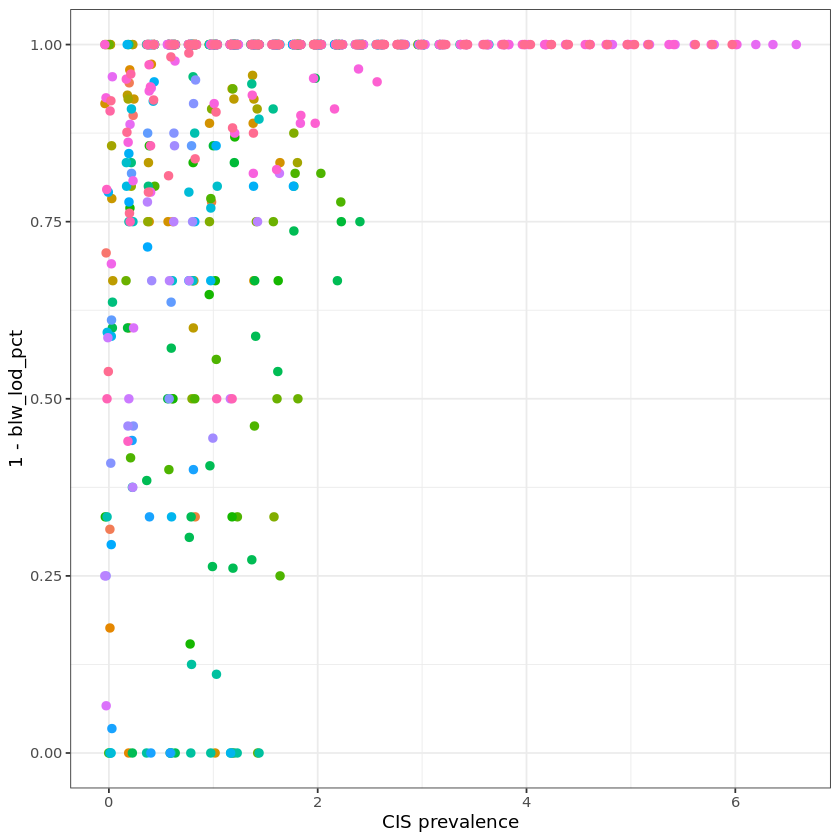

png 
  2

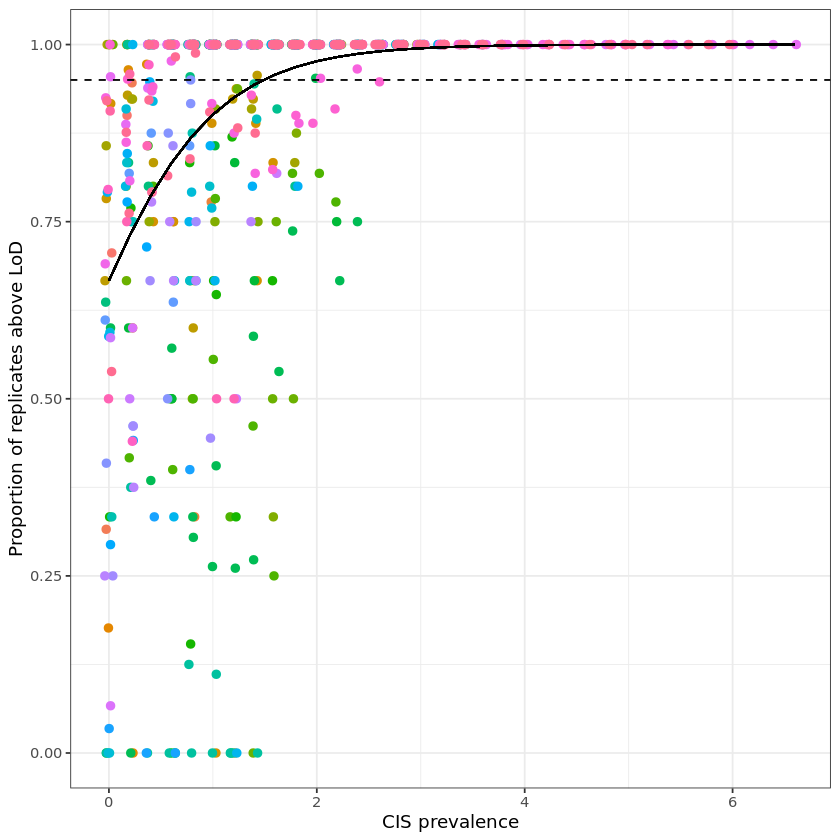

In [74]:
# site-specific model
# issues with grouping?

brks <- seq(0.0,6.8,by=0.2)
labels <- round(brks[1:(length(brks)-1)],1)
dat2$median_cut <- cut(dat2$median_prob,breaks=brks,labels=labels[1:(length(brks)-1)])
table(dat2$median_cut)

tab2 <- dat2 %>% group_by(median_cut,ww_site_code,labv) %>% summarize(n=n(),
                                        compo_frac = mean(compo_frac),
                                        blw_lod = sum(sars_raw_rep_below_lod),
                                        blw_lod_pct = sum(sars_raw_rep_below_lod)/n())
tab2 <- as.data.frame(tab2)
tab2$median_cut <- as.numeric(as.character(tab2$median_cut))
#print(table(tab2$compo_frac))
tab2$compo_frac <- as.numeric(as.character(tab2$compo_frac))

m2 <- glm(blw_lod_pct ~ median_cut,data=tab2,family=binomial)
print(summary(m2))
m2b <- glm(blw_lod_pct ~ median_cut + ww_site_code,data=tab2,family=binomial)
print(summary(m2b))
m2c <- glm(blw_lod_pct ~ median_cut + compo_frac + ww_site_code,data=tab2,family=binomial)
summary(m2c)
m2d <- glm(blw_lod_pct ~ median_cut + labv + ww_site_code,data=tab2,family=binomial)
summary(m2d)
# # m2b <- glm(blw_lod_pct ~ log(sars_cov2_gc_l_mean_cut_v2) ,data=tab2,family=binomial)
# # summary(m2b)
print(anova(m2,m2b,test="Chi"))

# print(head(ndat))

p2 <- ggplot(tab2,aes(jitter(median_cut),1-blw_lod_pct,
                      group=ww_site_code,color=ww_site_code)) + 
   geom_point(cex=2,show.legend=FALSE) + 
   xlab('CIS prevalence') +
   #theme(legend.position = "none") +
    theme_bw()
p2
 
tmp <- unique(dat2$ww_site_code)
ndat <- as.data.frame(expand.grid(x=brks[1:(length(brks)-1)],ww_site_code=tmp))
ndat$median_cut <- ndat$x
ndat$pred <- predict(m2,newdata = ndat,type = "response")
print(head(ndat))
p2a <- p2 + geom_hline(yintercept=0.95,linetype='dashed') +
   geom_line(data=ndat,aes(x=median_cut,y=1-pred),col='black') +
   xlab('CIS prevalence') + 
   ylab('Proportion of replicates above LoD')  
p2a


pdf(paste0(datadir,'lod_analysis_by_site_mar22.pdf'),height=5,width=6)
p2a
dev.off()

# #ggplot(data=ndat,aes(x=median_cut,y=pred,group=ww_site_code)) + 
# #geom_hline(yintercept=0.95) +
# #   geom_line() #+
# #   xlab('CIS prevalence') + 
# #   ylab('Proportion of replicates above LoD') 

